In [7]:
# results_analysis.ipynb
# Alexis Perumal, Venkat Pinnika, Young You, 1/6/2020
#
# For purposes of hyperparameter tuning, read in the results of a batch of prediction
# runs and plot them.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [10]:
!pwd


/Users/aperumal/OneDrive/Personal/UCSD_Data_Science_Bootcamp/Homework/2019-12-18_Proj1_Baseball-Predictor/baseball-predictor/alexis


In [12]:
metrics_file = "./output/2020-01-07_02-21-28.197561_output.csv"
results_df = pd.read_csv(metrics_file)
results_df.head()

,Unnamed: 0,Season,Lookback,Num Games,Num Correct,% Correct,Timestamp,Run Duration,Comment
0,0,2011,1,2429,1153,47.468094,2020-01-06 23:57:41.959736,0 days 00:00:48.485387000,"npp, FLO fix included."
1,1,2012,1,2430,1135,46.707819,2020-01-06 23:58:30.448600,0 days 00:00:49.743886000,"npp, FLO fix included."
2,2,2013,1,2431,1124,46.236117,2020-01-06 23:59:20.197113,0 days 00:00:49.725164000,"npp, FLO fix included."
3,3,2014,1,2430,1142,46.995885,2020-01-07 00:00:09.926086,0 days 00:00:49.785426000,"npp, FLO fix included."
4,4,2015,1,2429,1113,45.821326,2020-01-07 00:00:59.715606,0 days 00:00:49.123149000,"npp, FLO fix included."


In [13]:
season_gb = results_df.groupby('Season')
type(season_gb)
y = season_gb.get_group(2012)['% Correct']
print(y)
x = season_gb.get_group(2012)['Lookback']
print(x)


1      46.707819
8      48.971193
15     58.189300
22     59.917695
29     61.810700
36     63.497942
43     63.004115
50     62.057613
57     62.633745
64     60.740741
71     60.205761
78     60.288066
85     60.493827
92     57.983539
99     57.119342
106    55.925926
Name: % Correct, dtype: float64
1        1
8        2
15       5
22       6
29       7
36       8
43       9
50      10
57      11
64      12
71      13
78      14
85      15
92      20
99      50
106    100
Name: Lookback, dtype: int64


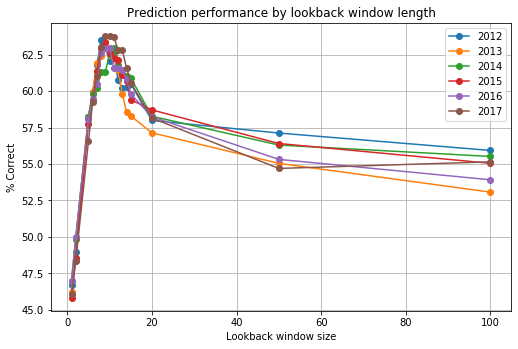

In [14]:
fig = plt.figure(figsize=(8,5))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_title('Prediction performance by lookback window length')
axes.set_xlabel('Lookback window size')
axes.set_ylabel('% Correct')

for season in range(2012, 2018):
    x = season_gb.get_group(season)['Lookback']
    y = season_gb.get_group(season)['% Correct']
    axes.plot(x, y, label=str(season), marker='o')
    
axes.legend()
axes.grid()
plt.show()

In [20]:
image_file = "plots/" + str(datetime.datetime.now()).replace(':', '-').replace(' ', '_') + '.png'
fig.savefig(image_file)

In [16]:
results_df
results_df2 = results_df.loc[(results_df['Lookback']<=20),:]
results_df2


,Unnamed: 0,Season,Lookback,Num Games,Num Correct,% Correct,Timestamp,Run Duration,Comment
0,0,2011,1,2429,1153,47.468094,2020-01-06 23:57:41.959736,0 days 00:00:48.485387000,"npp, FLO fix included."
1,1,2012,1,2430,1135,46.707819,2020-01-06 23:58:30.448600,0 days 00:00:49.743886000,"npp, FLO fix included."
2,2,2013,1,2431,1124,46.236117,2020-01-06 23:59:20.197113,0 days 00:00:49.725164000,"npp, FLO fix included."
3,3,2014,1,2430,1142,46.995885,2020-01-07 00:00:09.926086,0 days 00:00:49.785426000,"npp, FLO fix included."
4,4,2015,1,2429,1113,45.821326,2020-01-07 00:00:59.715606,0 days 00:00:49.123149000,"npp, FLO fix included."
...,...,...,...,...,...,...,...,...,...
93,93,2013,20,2431,1389,57.136981,2020-01-07 01:18:14.417184,0 days 00:00:55.786472000,"npp, FLO fix included."
94,94,2014,20,2430,1416,58.271605,2020-01-07 01:19:10.207391,0 days 00:00:55.600557000,"npp, FLO fix included."
95,95,2015,20,2429,1426,58.707287,2020-01-07 01:20:05.811655,0 days 00:00:55.632091000,"npp, FLO fix included."
96,96,2016,20,2428,1414,58.237232,2020-01-07 01:21:01.447363,0 days 00:00:55.483258000,"npp, FLO fix included."


In [17]:
season_gb2 = results_df2.groupby('Season')
type(season_gb2)
y2 = season_gb2.get_group(2012)['% Correct']
print(y2)
x2 = season_gb2.get_group(2012)['Lookback']
print(x2)

1     46.707819
8     48.971193
15    58.189300
22    59.917695
29    61.810700
36    63.497942
43    63.004115
50    62.057613
57    62.633745
64    60.740741
71    60.205761
78    60.288066
85    60.493827
92    57.983539
Name: % Correct, dtype: float64
1      1
8      2
15     5
22     6
29     7
36     8
43     9
50    10
57    11
64    12
71    13
78    14
85    15
92    20
Name: Lookback, dtype: int64


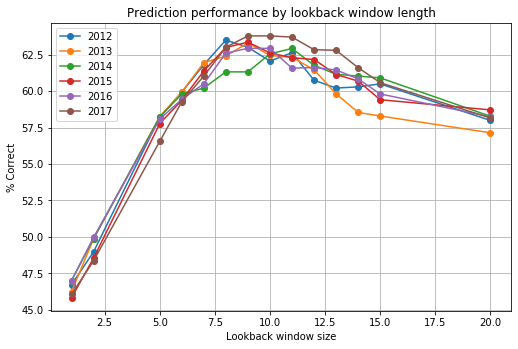

In [18]:
fig2 = plt.figure(figsize=(8,5))

axes = fig2.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_title('Prediction performance by lookback window length')
axes.set_xlabel('Lookback window size')
axes.set_ylabel('% Correct')

for season in range(2012, 2018):
    x2 = season_gb2.get_group(season)['Lookback']
    y2 = season_gb2.get_group(season)['% Correct']
    axes.plot(x2, y2, label=str(season), marker='o')
    
axes.legend()
axes.grid()
plt.show()

In [19]:
image_file = "plots/zoom" + str(datetime.datetime.now()).replace(':', '-').replace(' ', '_') + '.png'
fig2.savefig(image_file)